# Algoritmo de Deutsch-Jozsa
Uma função
$$f:\{0,\cdots,2^{n}-1\}\rightarrow \{0,1\},$$
ou
$$f:\{0,1\}^{n}\rightarrow \{0,1\},$$
é constante se
$$f(x)=f(y)\ \forall x,y$$
e balanceada se
$$f(x)=0$$
para metade ($2^n/2 = 2^{n-1}$) dos valores e
$$f(y)=1$$
para a outra metade. Aqui novamente estaremos interessados em resolver o __problema de Deutsch__, ou seja, dada uma caixa preta que implementa a função $f$, queremos determinar se $f$ é constante ou balanceada usando o menor número possível de consultas à caixa preta.


O circuito da figura abaixo ilustra o algoritmo quântico
de Deutsch-Jozsa para resolver esse problema consultando a caixa preta uma única vez.

![](https://drive.google.com/uc?export=view&id=1MoHXCAVsMsDTAU9oUZyhYwnqDndcXgrv)

Temos que
\begin{align}
|\psi_{0}\rangle & = |0\rangle^{\otimes n}|1\rangle \\
& \equiv |0\rangle\otimes\cdots\otimes|0\rangle\otimes|1\rangle.
\end{align}
Aplicando as portas de Hadamard, criamos a superposição de estados
\begin{align}
|\psi_{1}\rangle & = H^{\otimes n}H|\psi_{0}\rangle \\
& = H|0\rangle\otimes\cdots\otimes H|0\rangle\otimes H|1\rangle \\
& = |+\rangle\otimes\cdots\otimes |+\rangle\otimes |-\rangle \\
& = |+\rangle^{\otimes n}|-\rangle.
\end{align}
Usando alguns exemplos, veremos como o estado acima poder ser escrito como uma superposição:
\begin{align}
|+\rangle & = \frac{1}{2^{1/2}}\big(|0\rangle + |1\rangle\big) = \frac{1}{2^{1/2}}\sum_{x_{0}=0}^{1}|x_{0}\rangle, \\
|+\rangle^{\otimes 2} & = \frac{1}{2^{1/2}}\big(|0\rangle + |1\rangle\big)\frac{1}{2^{1/2}}\big(|0\rangle + |1\rangle\big) \\
& = \frac{1}{2^{2/2}}\big(|00\rangle + |01\rangle + |10\rangle + |11\rangle\big) \\
& = \frac{1}{2^{2/2}}\sum_{x_{1}=0}^{1}\sum_{x_{0}=0}^{1}|x_{1}x_{0}\rangle, \\
& \vdots \\
|+\rangle^{\otimes n} & = \frac{1}{2^{n/2}}\sum_{x_{n-1}=0}^{1}\cdots\sum_{x_{1}=0}^{1}\sum_{x_{0}=0}^{1}|x_{n-1}\cdots x_{1}x_{0}\rangle \\
& = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}|x\rangle, \\
\end{align}
Notemos que cada sequência
$$x_{n-1}\cdots x_{1}x_{0}$$
 nos fornece a representação binária, com $n$ bits, do número com representação decimal
$$x = x_{0}2^{0}+x_{1}2^{1}+\cdots+x_{n-1}2^{n-1}\in[0,2^{n}-1].$$

Teremos assim que
$$|\psi_{1}\rangle = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}|x\rangle|-\rangle = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}|x\rangle\frac{|0\rangle-|1\rangle}{\sqrt{2}}.$$

Agora vamos para a aplicação do oráculo, que neste caso também é definido como
$$U_{f}|x\rangle|y\rangle := |x\rangle|y\oplus f(x)\rangle.$$
Com isso obteremos
\begin{align}
|\psi_{2}\rangle & = U_{f}|\psi_{1}\rangle \\
& = \frac{1}{2^{(n+1)/2}}\sum_{x=0}^{2^{n}-1}\big(U_{f}|x\rangle|0\rangle - U_{f}|x\rangle|1\rangle\big) \\
& = \frac{1}{2^{(n+1)/2}}\sum_{x=0}^{2^{n}-1}\big(|x\rangle|0\oplus f(x)\rangle - |x\rangle|1\oplus f(x)\rangle\big) \\
& = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}|x\rangle\frac{|f(x)\rangle - |\overline{f(x)}\rangle}{\sqrt{2}} \\
& = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}|x\rangle(-1)^{f(x)}|-\rangle \\
& = \frac{1}{2^{n/2}}\sum_{x_{n-1},\cdots, x_{1},x_{0}=0}^{1}(-1)^{f(x_{n-1}\cdots x_{1}x_{0})}|x_{n-1}\cdots x_{1}x_{0}\rangle|-\rangle.
\end{align}
Ou seja, os primeiros $n$ qubits foram preparados em uma superposição de todos os estados da base computacional, igualmente prováveis, com os valores da função aparecendo nas fases dos estados individuais.

Por fim, usaremos interferência. Notando que
$$H|x_{j}\rangle = \frac{1}{2^{1/2}}\big(|0\rangle+(-1)^{x_{j}}|1\rangle\big),$$
aplicamos as $n$ portas de Hadamard para obter
\begin{align}
|\psi_{3}\rangle &= H^{\otimes n}\otimes I|\psi_{2}\rangle \\
& = \frac{1}{2^{n/2}}\sum_{x_{n-1},\cdots, x_{1},x_{0}=0}^{1}(-1)^{f(x_{n-1}\cdots x_{1}x_{0})}\Big(H|x_{n-1}\rangle\cdots H|x_{1}\rangle H|x_{0}\rangle\Big)|-\rangle \\
&  = \frac{1}{2^{n}}\sum_{x_{n-1},\cdots, x_{1},x_{0}=0}^{1}(-1)^{f(x_{n-1}\cdots x_{1}x_{0})}\Big(\big(|0\rangle+(-1)^{x_{n-1}}|1\rangle\big)\cdots \big(|0\rangle+(-1)^{x_{1}}|1\rangle\big) \big(|0\rangle+(-1)^{x_{0}}|1\rangle\big)\Big)|-\rangle
\end{align}
Agora, notamos que
\begin{align}
\big(|0\rangle+(-1)^{x_{j}}|1\rangle\big) & = (-1)^{x_{j}0}|0\rangle + (-1)^{x_{j}1}|1\rangle \\
& = \sum_{z_{j}=0}^{1}(-1)^{x_{j}z_{j}}|z_{j}\rangle,
\end{align}
para escrever
\begin{align}
|\psi_{3}\rangle & = \frac{1}{2^{n}}\sum_{x_{n-1},\cdots, x_{1},x_{0}=0}^{1}(-1)^{f(x_{n-1}\cdots x_{1}x_{0})}\Big(\sum_{z_{n-1}=0}^{1}(-1)^{x_{n-1}z_{n-1}}|z_{n-1}\rangle\cdots \sum_{z_{1}=0}^{1}(-1)^{x_{1}z_{1}}|z_{1}\rangle \sum_{z_{0}=0}^{1}(-1)^{x_{0}z_{0}}|z_{0}\rangle\Big)|-\rangle \\
& = \frac{1}{2^{n}}\sum_{x_{n-1},\cdots, x_{1},x_{0}=0}^{1}\sum_{z_{n-1},\cdots, z_{1},z_{0}=0}^{1}(-1)^{f(x_{n-1}\cdots x_{1}x_{0})+x_{n-1}z_{n-1}+\cdots+x_{1}z_{1}+x_{0}z_{0}}|z_{n-1}\cdots z_{1}z_{0}\rangle|-\rangle \\
& =: \frac{1}{2^{n}}\sum_{x=0}^{2^{n}-1}\sum_{z=0}^{2^{n}-1}(-1)^{f(x)+x\cdot z}|z\rangle|-\rangle \\
& =: \sum_{z=0}^{2^{n}-1}c_{z}|z\rangle|-\rangle,
\end{align}
em que definimos
$$x\cdot z := x_{n-1}z_{n-1}+\cdots+x_{1}z_{1}+x_{0}z_{0} = \sum_{j=0}^{n-1}x_{j}z_{j}$$
e
$$c_{z} := \frac{1}{2^{n}}\sum_{x=0}^{2^{n}-1}(-1)^{f(x)+x\cdot z}.$$

Seguindo, olhamos para o coeficiente
$$c_{0}=c_{0\cdots00}.$$
Nesse caso, como
$$z_{n-1}=\cdots=z_{1}=z_{0}=0$$
teremos
$$x\cdot z=0$$
e
$$c_{0} = \frac{1}{2^{n}}\sum_{x=0}^{2^{n}-1}(-1)^{f(x)}.$$

Por conseguinte
\begin{equation}
\begin{cases}
f\text{ é constante }\therefore c_{0} = \frac{1}{2^{n}}\sum_{x=0}^{2^{n}-1}(\pm 1) = \pm 1 \ \therefore\ Pr(0\cdots 00)=1, \\
f\text{ é balanceada }\therefore c_{0} = \frac{1}{2^{n}}0 = 0 \ \therefore\ Pr(0\cdots 00)=0.
\end{cases}
\end{equation}
Acima usamos que se $f$ é constante então $f(x)$ é igual a $0$ ou igual $1$ pra todo $x$. Se $f$ é balanceada, então $f(x)$ é igual a $0$ para metade dos valores de $x$ e igual a $1$ para a outra metade dos valores de $x$.

## Implementação no IBMQ

Usaremos o Primitive Sampler.

In [ ]:
!pip install qiskit
!pip install qiskit_aer
!pip install matplotlib
!pip install pylatexenc
!pip install qiskit-ibm-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import math
from qiskit import QuantumCircuit

In [ ]:
def qc_deutsch_jozsa(n, typ):
  qc = QuantumCircuit(n+1,n)
  qc.x(n)
  qc.h(list(range(n+1)))
  if typ == 'c':
    qc_uf = qc_Uf_c(n)
  elif typ == 'b':
    qc_uf = qc_Uf_b(n)
  qc.append(qc_uf, list(range(n+1)))
  qc.h(list(range(n)))
  qc.measure(list(range(n)),list(range(n)))
  return qc

## Exemplo: Função constante
Vamos considerar $f:\{0,1\}^3\rightarrow \{0,1\}$ com
$$f_c = f(x)=1\ \forall x.$$
Temos assim que
\begin{align}
U_f & = \sum_{x=0}^{2^3 -1}\sum_{y=0}^{2^1 -1} |x\rangle\langle x|\otimes|y\oplus f(x)\rangle\langle y| \\
& = \sum_{x=0}^{7}\sum_{y=0}^{1} |x\rangle\langle x|\otimes|y\oplus 1\rangle\langle y| \\
& = \sum_{x=0}^{7}|x\rangle\langle x|\otimes \sum_{y=0}^{1}|\overline{y}\rangle\langle y| \\
& = \sum_{x=0}^{7}|x\rangle\langle x|\otimes (|1\rangle\langle 0|+|0\rangle\langle 1|) \\
& = I_8\otimes X \\
& \equiv I\otimes I\otimes I\otimes X.
\end{align}

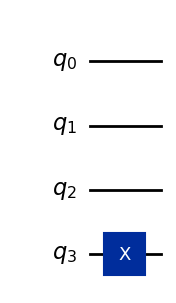

In [ ]:
def qc_Uf_c(n):
    qc = QuantumCircuit(n+1, name='Ufc')
    qc.x(n)
    return qc

qc = qc_Uf_c(3); qc.draw('mpl')

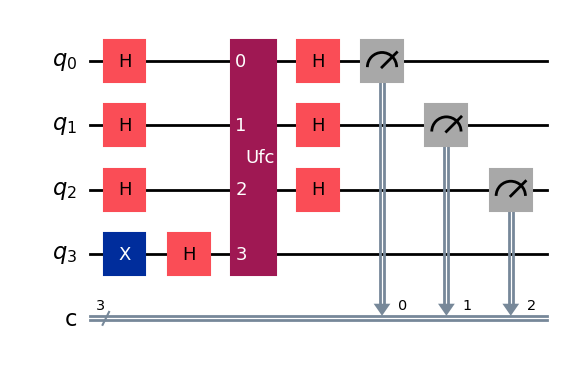

In [ ]:
qc = qc_deutsch_jozsa(3, 'c')
qc.draw('mpl')

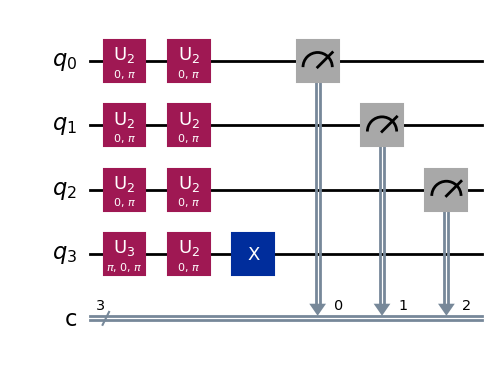

In [ ]:
qc = qc_deutsch_jozsa(3, 'c')
qc.decompose().draw('mpl')

### Simulação

In [ ]:
from qiskit_aer import AerSimulator # só há simulador local agora
backend = AerSimulator()

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(backend=backend)

In [ ]:
qc = qc_deutsch_jozsa(3,'c')
qc_list = []
qc_list.append(qc.decompose()) # deu erro sem o decompose
job = sampler.run(qc_list, shots = 4096)

In [ ]:
counts_sim = job.result()[0].data.c.get_counts()
counts_sim

{'000': 4096}

### Experimento

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum", token="83ab2a86232e48767228534cdae2cf55b8e8ea4e0eb1e57804268f40d7bee64692f719528e8871de617ffc35040d21bd389f4696313f46900c077c7f617a1512")
backend = service.backend(name="ibm_brisbane")

In [ ]:
from qiskit import transpile
qc = qc_deutsch_jozsa(3,'c')
qc_list = []
qc_list.append(qc.decompose())
qc_transpiled_list = transpile(qc_list, backend=backend, optimization_level=1)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(backend=backend)
sampler.options.dynamical_decoupling.enable = True
sampler.options.dynamical_decoupling.sequence_type = "XY4"

In [ ]:
job = sampler.run(qc_transpiled_list)
print(job.job_id())

csbj734d3kwg008hdjx0


In [ ]:
# para cancelar um job usa
#job = backend.retrieve_job(job_id)
#job.cancel() ???

In [ ]:
job_id = "csbj734d3kwg008hdjx0"
job = service.job(job_id)
counts_exp = job.result()[0].data.c.get_counts()
counts_exp

{'000': 3801, '001': 216, '100': 22, '010': 55, '011': 2}

In [ ]:
job.result()[0].data.c.num_shots

4096

### Gráfico

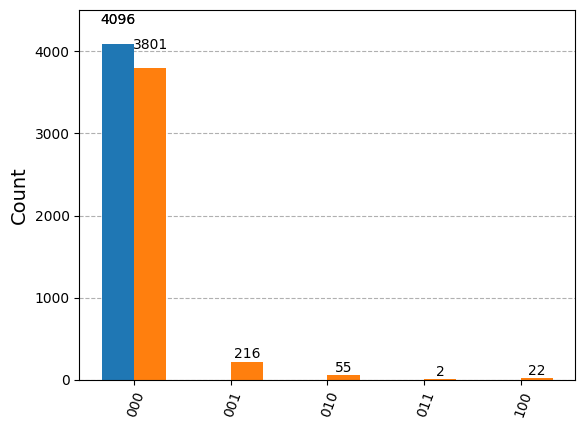

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram([counts_sim,counts_exp])

## Exemplo: Função balanceada
Vamos considerar $f:\{0,1\}^3\rightarrow \{0,1\}$ com
$$f_b = f(x)=\begin{cases}0 \text{ se } x\le 3 \\ 1 \text{ se } x> 3 \end{cases}.$$
Temos assim que
\begin{align}
U_f & = \sum_{x=0}^{2^3 -1}\sum_{y=0}^{2^1 -1} |x\rangle\langle x|\otimes|y\oplus f(x)\rangle\langle y| \\
& = \sum_{x=0}^{3}\sum_{y=0}^{1} |x\rangle\langle x|\otimes|y\oplus f(x)\rangle\langle y| + \sum_{x=4}^{7}\sum_{y=0}^{1} |x\rangle\langle x|\otimes|y\oplus f(x)\rangle\langle y| \\
& = \sum_{x=0}^{3}\sum_{y=0}^{1} |x\rangle\langle x|\otimes|y\oplus 0\rangle\langle y| + \sum_{x=4}^{7}\sum_{y=0}^{1} |x\rangle\langle x|\otimes|y\oplus 1\rangle\langle y| \\
& = \sum_{x=0}^{3} |x\rangle\langle x|\otimes\sum_{y=0}^{1}|y\rangle\langle y| + \sum_{x=4}^{7} |x\rangle\langle x|\otimes\sum_{y=0}^{1}|\overline{y}\rangle\langle y| \\
& = (|0\rangle\langle 0|+|1\rangle\langle 1|+|2\rangle\langle 2|+|3\rangle\langle 3|)\otimes I_2 + (|4\rangle\langle 4|+|5\rangle\langle 5|+|6\rangle\langle 6|+|7\rangle\langle 7|)\otimes X \\
& = (|000\rangle\langle 000|+|001\rangle\langle 001|+|010\rangle\langle 010|+|011\rangle\langle 011|)\otimes I_2 \\
& + (|100\rangle\langle 100|+|101\rangle\langle 101|+|110\rangle\langle 110|+|111\rangle\langle 111|)\otimes X \\
& = |0\rangle\langle 0|\otimes(|00\rangle\langle 00|+|01\rangle\langle 01|+|10\rangle\langle 10|+|11\rangle\langle 11|)\otimes I_2 \\
& + |1\rangle\langle 1|\otimes(|00\rangle\langle 00|+|01\rangle\langle 01|+|10\rangle\langle 10|+|11\rangle\langle 11|)\otimes X \\
& = |0\rangle\langle 0|\otimes I_4\otimes I_2 + |1\rangle\langle 1|\otimes I_4\otimes X \\
& = |0\rangle\langle 0|\otimes I\otimes I\otimes I + |1\rangle\langle 1|\otimes I\otimes I\otimes X \\
& \equiv C_X^{0_1\rightarrow 3}.
\end{align}

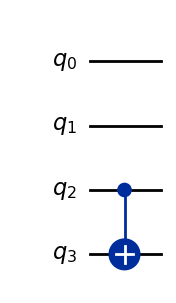

In [ ]:
def qc_Uf_b(n):
    qc = QuantumCircuit(n+1, name='Uf_b')
    qc.cx(n-1,n)
    return qc

qc = qc_Uf_b(3); qc.draw('mpl')

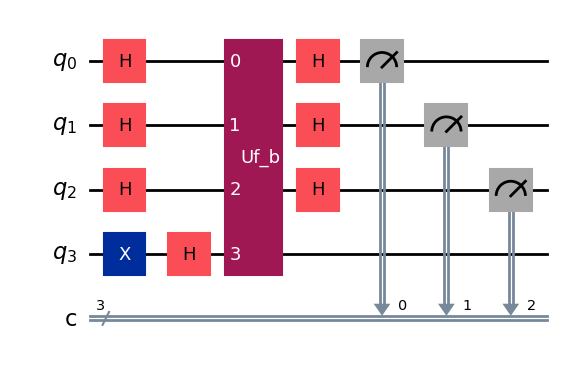

In [ ]:
qc = qc_deutsch_jozsa(3, 'b')
qc.draw('mpl')

### Simulação

In [ ]:
from qiskit_aer import AerSimulator
backend = AerSimulator()

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(backend=backend)

In [ ]:
qc = qc_deutsch_jozsa(3,'b')
qc_list = []
qc_list.append(qc.decompose())
job = sampler.run(qc_list, shots = 4096)

In [ ]:
counts_sim = job.result()[0].data.c.get_counts()
counts_sim

{'100': 4096}

### Experimento

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum", token="83ab2a86232e48767228534cdae2cf55b8e8ea4e0eb1e57804268f40d7bee64692f719528e8871de617ffc35040d21bd389f4696313f46900c077c7f617a1512")
backend = service.backend(name="ibm_brisbane")

In [ ]:
from qiskit import transpile
qc = qc_deutsch_jozsa(3,'b')
qc_list = []
qc_list.append(qc.decompose())
qc_transpiled_list = transpile(qc_list, backend=backend, optimization_level=1)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(backend=backend)
sampler.options.dynamical_decoupling.enable = True
sampler.options.dynamical_decoupling.sequence_type = "XY4"

In [ ]:
job = sampler.run(qc_transpiled_list)
print(job.job_id())

csbjfhyd3kwg008hdmb0


In [ ]:
job_id = "csbjfhyd3kwg008hdmb0"
job = service.job(job_id)
counts_exp = job.result()[0].data.c.get_counts()
counts_exp

{'100': 3610, '101': 201, '000': 199, '110': 69, '001': 9, '111': 6, '010': 2}

### Gráfico

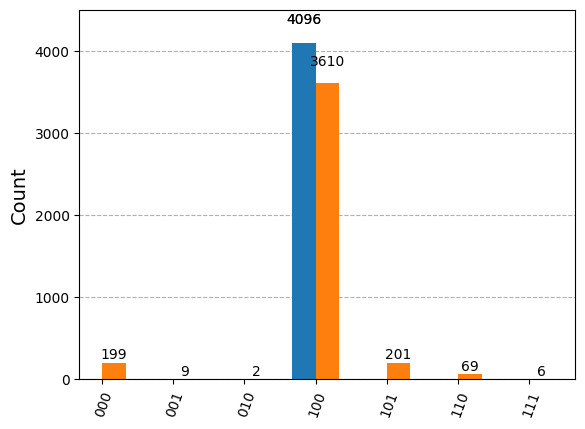

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram([counts_sim,counts_exp])

## Complexidade computacional do problema de Deutsch

### Algoritmo quântico

Para o problema de Deutsch com a caixa preta retornado uma função $f:\{0,1\}^n\rightarrow\{0,1\}$, usando o algoritmo quântico de Deutsch-Jozsa, em princípio, podemos determinar se a função é constante ou balanceada consultando a caixa preta uma única vez. Portanto, a complexidade computacional quântica é
$$CC_{Q}=\mathcal{O}(1).$$
 Vale observar, no entanto, que para computadores quânticos na era NISQ (Near Term Quantum Device), temos erros e decorência e por isso temos que fazer um certo número finito $N$ de medidas para estimar as probabilidades, e temos uma flutuação estatística associada a esse número. Existe assim uma relação de restrição entre o quão ruidoso é o computador quântico e o quão alto deve ser $N$. Quanto mais ruído, maior deve ser $N$, com a proporcionalidade não sendo simples de se estabelecer.

### Algoritmo clássico determinístico

No caso de um algoritmo clássico determinístico, se a função é constante temos que consultar a caixa preta $2^{n-1}+1$ vezes para ter certeza disso. Se a função é balanceada, na melhor da hipóteses podemos identificar isso com 2 consultas (e.g. $1ª$ consulta retorna $0$ e a $2ª$ retorna $1$). No entanto, na pior da hipóteses, podemos precisar de $2^{n-1}+1$ consultas (e.g. as $2^{n-1}$ primeiras consultas retornam $0$ e a consulta de número $2^{n-1}+1$ retorna $1$). Como a probabilidade de qualquer um dos números de consultas ser necessário é a mesma, $1/2^{n-1}$ que é o número de possibilidades, temos que fazer em média o seguinte número de consultas:
\begin{align}
N_c(D) & = \Big(\frac{1}{2^{n-1}}2 + \frac{1}{2^{n-1}}3 + \cdots + \frac{1}{2^{n-1}}2^{n-1} + \frac{1}{2^{n-1}}\big(2^{n-1}+1\big)\Big) \\
& = \frac{1}{2^{n-1}}\Big(1 + 2 + 3 + \cdots + 2^{n-1} + 2^{n-1}\Big) \\
& = \frac{1}{2^{n-1}}\Big(\frac{2^{n-1}\big(2^{n-1}+1\big)}{2} + 2^{n-1}\Big) \\
& = \frac{\big(2^{n-1}+1\big)}{2} + 1 \\
& = 2^{n-2}+1/2 + 1, \\
\end{align}
em que usamos a série $\sum_{j=1}^{N}j = N(N+1)/2.$ Então, para $n\gg 1$, a complexidade computacional determinística clássica é
$$CC_{CD} = \mathcal{O}(2^{n-2}),$$
ou seja, cresce exponencialmente com $n$.

### Algoritmo clássico probabilístico

No entanto, podemos usar um algoritmo clássico probabilístico. Um técnica probabilística simples é consultar a caixa preta para dois elementos, $x$ e $x'$, do domínio $\{0,1\}^n = \{0,1,2,\cdots,2^n-2,2^n-1\}$ sorteados aleatoriamente. Se $f(x)=f(x')$, concluímos que a função é constante, se $f(x)\ne f(x')$ concluímos que a função é balanceada.

Usando esse procedimento, se a função é _constante_ acertaremos sempre, com probabilidade igual a $1$.

Se a função é _balanceada_, a probabilidade de acerto é dada, por exemplo, por
\begin{align}
p_a & = Pr(f(x)=0,f(x')=1) + Pr(f(x)=1,f(x')=0) \\
& = Pr(f(x)=0)Pr(f(x')=1|f(x)=0) + Pr(f(x)=1)Pr(f(x')=0|f(x)=1) \\
& = 2Pr(f(x)=0)Pr(f(x')=1|f(x)=0),
\end{align}
em que usamos
$$Pr(f(x)=0)Pr(f(x')=1|f(x)=0) + Pr(f(x)=1)Pr(f(x')=0|f(x)=1)$$
pela simetria do problema.

Temos que $Pr(f(x)=0)Pr(f(x')=1|f(x)=0)$ é o produto da probabilidade de obtermos $f(x)=0$ no 1º sorteiro pela probabilidade de obtermos $f(x')=1$ no 2º sorteio condicionada em termos obtido $f(x)=0$ no 1º sorteio. Para o 1º sorteio temos $2^n$ possibilidades para $x$ e temos $2^{n-1}$ valores de $x$ tais que $f(x)=0$. Com isso, vem que
$$Pr(f(x)=0) = \sum_{j=1}^{2^{n-1}}\frac{1}{2^n} = \frac{2^{n-1}}{2^n} = \frac{1}{2}.$$
Para o 2º sorteio temos $2^n -1$ possibilidades de valores de $x'$ e $2^{n-1}$ valores de $x'$ tais que $f(x')=1$. Assim
$$Pr(f(x')=1|f(x)=0) = \sum_{j=1}^{2^{n-1}}\frac{1}{2^n -1} = \frac{2^{n-1}}{2^n - 1} \approx \frac{1}{2}$$
para $n\gg 1.$ Por conseguinte
$$p_a \approx 2\frac{1}{4} = \frac{1}{2}.$$
Ou seja, em média duas rodadas, com 2 consultas da caixa preta cada rodada, são suficientes para inferirmos que a função é balanceada. Como esse número não depende de $n$, dizemos que a complexidade computacional do algoritmo clássico probabilístico é constante, o que é denotado por
$$CC_{CP} = \mathcal{O}(1).$$

Com isso, vemos que o algoritmo de Deutsch-Jozsa não tem vantagem computacional significativa (é um vantagem constante) sobre algoritmos clássicos probabilísticos.


## Referências

1. D. Deutsch and R. Jozsa, “Rapid solution of problems by quantum computation,” Proceedings of the Royal Society of London. Series A: Mathematical and Physical Sciences, vol. 439, no. 1907, pp. 553-558, Jan. 1997, doi: 10.1098/rspa.1992.0167.

1. M. A. Nielsen and I. L. Chuang, Quantum Computation and Quantum Information (Cambridge University Press, Cambridge, England, 2000).

1. Richard Cleve, Introduction to Quantum Information Processing (2023), https://cs.uwaterloo.ca/~cleve/courses/F11CS667/, https://youtube.com/playlist?list=PLgOc9DWm_Ey3cnHXjmu8f__ki5AJYd53p&si=etCdYsFeCUBTgclj.

1. Dave Bacon, Lecture Notes on Quantum Computing (2006), https://courses.cs.washington.edu/courses/cse599d/06wi/.

1. A. N. Oliveira, E. V. B. de Oliveira, A. C. Santos, and C. J. Villas-Bôas, “Quantum Algorithms in IBMQ Experience: Deutsch-Jozsa algorithm,” Rev. Bras. Ensino Fís., vol. 44, p. e20210333, 2022, doi: 10.1590/1806-9126-RBEF-2021-0333.

1. A. Javadi-Abhari et al., “Quantum computing with Qiskit.” arXiv, May 14, 2024. doi: 10.48550/arXiv.2405.08810.
